### 1. K-Means clustering after performing dimensionality reduction (PCA) [16 Marks]
    o Identification and treatment of any Missing Values; [1 Mark]
    o Identification and treatment of any Outliers; [1 Mark]
    o Data Normalisation; [2 Marks]
    o Dimensionality Reduction Using PCA; [3 Marks]
    o Find the ideal number of clusters – justify it by showing two different/methods (via manual or automated tools); [3 Marks]
    o Perform K-Means, on the reduced by PCA data set; [3 Marks]
    o Project each original feature on the principal component axis, to represent the level of importance of each feature in the multidimensional scaling.[3 Marks]

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

## https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [46]:
covid_data = pd.read_csv("./CW1_COVID_world_data.csv") 
covid_data.head(10)

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
0,World,NaN,406944092,638463.0,5810434,2654.0,327036011.0,915688.0,74097647.0,89283.0,52207.0,745.4,NaN,NaN
1,USA,334125343,79052681,NaN,"939,427",NaN,49435538.0,NaN,28677716.0,17454.0,236596.0,2812.0,923990953.0,2765402.0
2,India,1401828285,42536137,NaN,"507,208",NaN,41331158.0,NaN,697771.0,8944.0,30343.0,362.0,747870047.0,533496.0
3,Brazil,214990157,27125512,NaN,"636,111",NaN,23446849.0,NaN,3042552.0,8318.0,126171.0,2959.0,63776166.0,296647.0
4,France,65505907,21372278,NaN,"134,207",NaN,16256611.0,389010.0,4981460.0,3622.0,326265.0,2049.0,238632994.0,3642923.0
5,UK,68459737,18162199,NaN,"159,158",NaN,15681335.0,NaN,2321706.0,430.0,265298.0,2325.0,463984342.0,6777478.0
6,Russia,146035150,13731794,203949.0,"338,813",722.0,11021633.0,112236.0,2371348.0,2300.0,94031.0,2320.0,263100000.0,1801621.0
7,Turkey,85798778,12653276,NaN,"89,741",NaN,11755917.0,NaN,807618.0,1128.0,147476.0,1046.0,135764979.0,1582365.0
8,Italy,60318767,11923631,NaN,"150,221",NaN,9960136.0,NaN,1813274.0,1322.0,197677.0,2490.0,178984246.0,2967306.0
9,Germany,84214984,11897002,NaN,"120,196",NaN,8597300.0,110200.0,3179506.0,2274.0,141269.0,1427.0,89622218.0,1064208.0


In [4]:
# available columns in dataset.
covid_data.keys() 

Index(['Country', 'Population', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Revovered', 'Active Cases',
       'Serious, Critical Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop',
       'Total Tests', 'Tests/ 1M pop'],
      dtype='object')

In [5]:
# numbers of row*column in dataset.
covid_data.shape

(227, 14)

In [6]:
# find 

In [7]:
covid_data.dtypes

Country                     object
Population                  object
Total Cases                  int64
New Cases                  float64
Total Deaths                object
New Deaths                 float64
Total Recovered            float64
New Revovered              float64
Active Cases               float64
Serious, Critical Cases    float64
Tot Cases/ 1M pop          float64
Deaths/ 1M pop             float64
Total Tests                float64
Tests/ 1M pop              float64
dtype: object

 ## Identification and treatment of any Missing Values

In [45]:
#Data cleaning

# replace NAN with zero
covid_data = covid_data.replace('nan', np.nan).fillna(0)

# check any NAN values in any rows.
covid_data.isnull().any(axis=1)

# convert columns (Population,Total Deaths) from object to float64
covid_data['Population'] = covid_data['Population'].astype(str).str.replace(',', '')
covid_data['Population'] = covid_data['Population'].astype(float)

covid_data['Total Deaths'] = covid_data['Total Deaths'].astype(str).str.replace(',', '')
covid_data['Total Deaths'] = covid_data['Total Deaths'].astype(float)
covid_data_with_country = covid_data.iloc[1:226,0:]
covid_data_without_country = covid_data.iloc[1:226,1:]
covid_data_without_country.head(10)


,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
1,3.341253e+08,79052681,0.0,939427.0,0.0,49435538.0,0.0,28677716.0,17454.0,236596.0,2812.0,923990953.0,2765402.0
2,1.401828e+09,42536137,0.0,507208.0,0.0,41331158.0,0.0,697771.0,8944.0,30343.0,362.0,747870047.0,533496.0
3,2.149902e+08,27125512,0.0,636111.0,0.0,23446849.0,0.0,3042552.0,8318.0,126171.0,2959.0,63776166.0,296647.0
4,6.550591e+07,21372278,0.0,134207.0,0.0,16256611.0,389010.0,4981460.0,3622.0,326265.0,2049.0,238632994.0,3642923.0
5,6.845974e+07,18162199,0.0,159158.0,0.0,15681335.0,0.0,2321706.0,430.0,265298.0,2325.0,463984342.0,6777478.0
6,1.460352e+08,13731794,203949.0,338813.0,722.0,11021633.0,112236.0,2371348.0,2300.0,94031.0,2320.0,263100000.0,1801621.0
7,8.579878e+07,12653276,0.0,89741.0,0.0,11755917.0,0.0,807618.0,1128.0,147476.0,1046.0,135764979.0,1582365.0
8,6.031877e+07,11923631,0.0,150221.0,0.0,9960136.0,0.0,1813274.0,1322.0,197677.0,2490.0,178984246.0,2967306.0
9,8.421498e+07,11897002,0.0,120196.0,0.0,8597300.0,110200.0,3179506.0,2274.0,141269.0,1427.0,89622218.0,1064208.0
10,4.678392e+07,10555196,0.0,95606.0,0.0,7264623.0,0.0,3194967.0,1633.0,225616.0,2044.0,66213858.0,1415312.0


In [9]:
covid_data.describe()

,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop
count,2.270000e+02,2.270000e+02,227.000000,2.270000e+02,227.000000,2.270000e+02,227.000000,2.270000e+02,227.000000,227.000000,227.000000,2.270000e+02,2.270000e+02
mean,3.471720e+07,5.378116e+06,8437.837004,7.678988e+04,35.074890,4.312331e+06,12102.511013,9.712084e+05,1179.951542,108701.370485,1015.532159,2.320395e+07,1.540834e+06
std,1.385593e+08,3.852783e+07,61712.009802,5.493980e+05,260.238775,3.089803e+07,89997.735981,7.186731e+06,8461.150765,115525.250779,1129.989698,8.998960e+07,2.840664e+06
min,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,5.000335e+05,1.995450e+04,0.000000,1.845000e+02,0.000000,1.135750e+04,0.000000,1.198000e+03,0.000000,6831.500000,104.500000,2.223050e+05,6.697850e+04
50%,5.736334e+06,1.384310e+05,0.000000,1.907000e+03,0.000000,9.616200e+04,0.000000,1.166500e+04,14.000000,73679.000000,636.000000,1.553431e+06,5.817340e+05
75%,2.169091e+07,9.791650e+05,0.000000,1.323500e+04,0.000000,7.473720e+05,0.000000,1.110630e+05,183.500000,178028.000000,1592.000000,1.014089e+07,1.699880e+06
max,1.439324e+09,4.069441e+08,638463.000000,5.810434e+06,2654.000000,3.270360e+08,915688.000000,7.409765e+07,89283.000000,534722.000000,6156.000000,9.239910e+08,2.103074e+07


## Identification and treatment of any Outliers;

(225, 13)


KeyError: 0

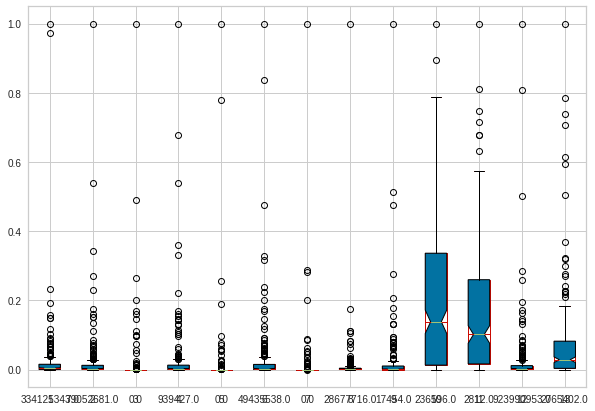

In [29]:
#covid_data_without_x = covid_data.drop('Country', 1)

scaler = MinMaxScaler()
covid_scaled_data_x = scaler.fit_transform(covid_data_without_country)
print(covid_scaled_data_x.shape)
type(covid_scaled_data_x)
'''
plt.figure(figsize=(16,6))
plt.subplot(2,2,1)
sns.distplot(covid_scaled_data_x[:1])
plt.subplot(2,2,2)
sns.boxplot(covid_scaled_data_x[:1])

plt.subplot(2,2,3)
sns.distplot(covid_scaled_data_x[:2])
plt.subplot(2,2,4)
sns.boxplot(covid_scaled_data_x[:2])
plt.show()
'''
c = "red"
#Identification of Outliers
fig = plt.figure(figsize =(10, 7))
"""
plt.boxplot(covid_scaled_data_x,positions=[1,2,3,4,5,6,7,8,9,10,11,12,13], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),)
"""
box = plt.boxplot(covid_scaled_data_x, showfliers=False)
# change the color of its elements
for _, line_list in box.items():
    for line in line_list:
        line.set_color('r')

labels = covid_data_without_country.iloc[0]

# notch shape box plot
bplot2 = plt.boxplot(covid_scaled_data_x,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']

for patch, color in zip(bplot2[0], colors):
    patch.set_facecolor(color)
        
plt.show()

## Data Normalisation

In [48]:
scaler = MinMaxScaler()
covid_scaled_data = scaler.fit_transform(covid_data_without_country)
print(covid_scaled_data.shape)
covid_scaled_data[0]

(225, 13)


array([0.2321405 , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.44246543,
       0.45679012, 1.        , 0.13149335])

## Dimensionality Reduction Using PCA

In [31]:
pca = PCA()
pca.fit_transform(covid_scaled_data)

array([[ 1.08581293e+00,  2.04752268e+00,  3.10499543e-01, ...,
         8.45147359e-04, -4.47230107e-04, -8.51273391e-05],
       [ 2.44947694e-01,  1.51048914e+00,  3.64837999e-01, ...,
         6.41466180e-02, -7.71845096e-03,  2.73254302e-03],
       [ 4.38377237e-01,  7.83325968e-01, -1.62811899e-01, ...,
        -5.37808984e-02,  1.10703913e-02, -5.93124046e-03],
       ...,
       [-2.77744729e-01,  1.86590407e-02,  1.76391992e-02, ...,
        -2.33691894e-03,  1.51517246e-03,  4.82562741e-05],
       [-2.77457279e-01,  1.85241404e-02,  1.77417570e-02, ...,
        -2.33685729e-03,  1.53571840e-03,  4.80967507e-05],
       [-2.77891797e-01,  1.87335607e-02,  1.75887101e-02, ...,
        -2.33852553e-03,  1.50307171e-03,  4.84013094e-05]])

Text(0, 0.5, 'Cumulative Explained Variance')

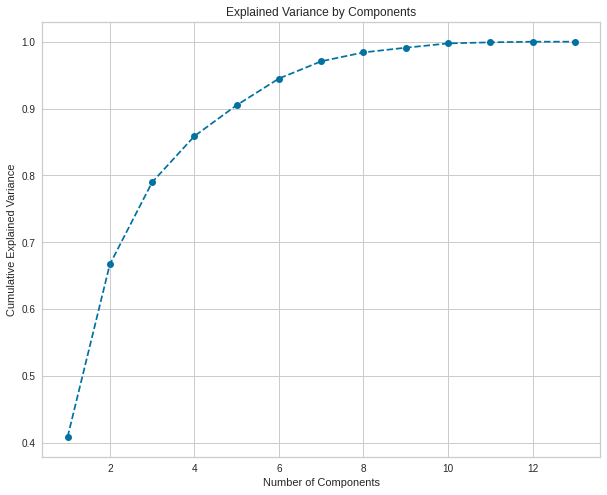

In [32]:
plt.figure(figsize = (10,8))
plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

([<matplotlib.axis.XTick at 0x7f367bc3e9a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

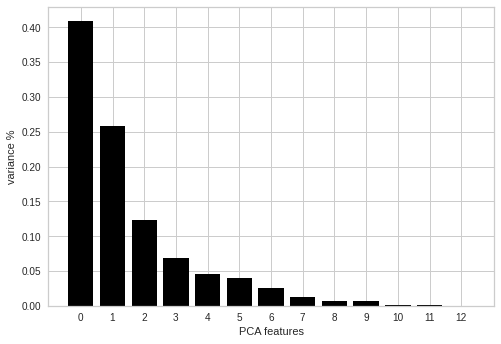

In [33]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [34]:
pca_n = PCA(n_components=5)
x_pca_covid_data = pca_n.fit_transform(covid_scaled_data)
PCA_components = pd.DataFrame(x_pca_covid_data)
PCA_components.head()

,0,1,2,3,4
0,1.085813,2.047523,0.310500,-0.324870,-0.024700
1,0.244948,1.510489,0.364838,-0.193047,0.054322
2,0.438377,0.783326,-0.162812,-0.134054,0.038945
3,0.625847,0.370158,0.150688,0.142083,-0.294915
4,0.555399,0.314594,0.188688,-0.040646,0.129642


In [35]:
print("x_pca_covid_data.shape",x_pca_covid_data.shape)
print("pca.explained_variance_ratio_:",pca_n.explained_variance_ratio_)
print("pca.n_components_:",pca_n.n_components_)

x_pca_covid_data.shape (225, 5)
pca.explained_variance_ratio_: [0.40886754 0.25817183 0.12273769 0.06893528 0.04634754]
pca.n_components_: 5


## Find the ideal number of clusters – justify it by showing two different/methods (via manual or automated tools)

In [36]:
wcss=[]
# fitting multiple k-means algorithms
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x_pca_covid_data)
    wcss.append(kmeans.inertia_)

print("The inertia of the clusters : ",wcss)

The inertia of the clusters :  [35.88691410700375, 23.93840982220656, 16.60512621120082, 13.556049910186935, 11.187732787055756, 9.272880177162886, 7.788462104322478, 6.677972471045457, 5.990714540075264, 5.482235155425499, 4.942209323946654, 4.370706341695556, 4.102533026814175, 3.7820332713687037, 3.4444308647994455]


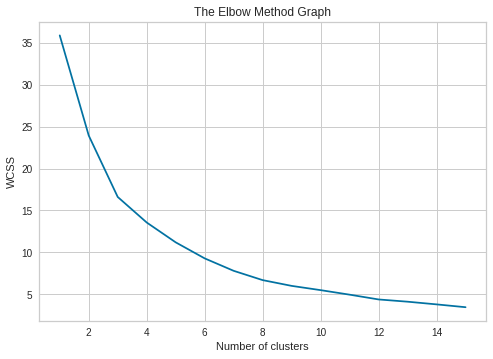

In [37]:
# fitting multiple k-means algorithms and storing the values in an empty list using Elbow method
plt.plot(range(1,16),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('T1_EMG.png', dpi=1080, format='png')
plt.show()

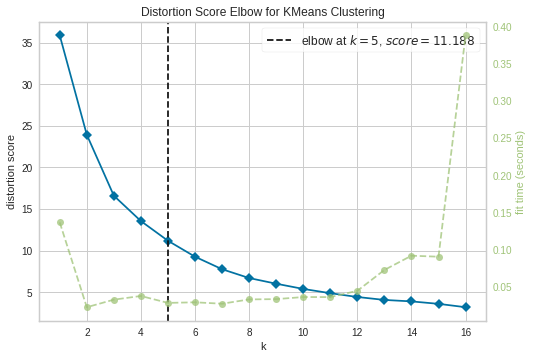

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<Figure size 576x396 with 0 Axes>

In [38]:
# Elbow method with Yellowbrick Visualiser
visualizer = KElbowVisualizer(kmeans, k=(1,17))
visualizer.fit(x_pca_covid_data)
visualizer.show()
visualizer.show(outpath="T1_EMG_YB.png")

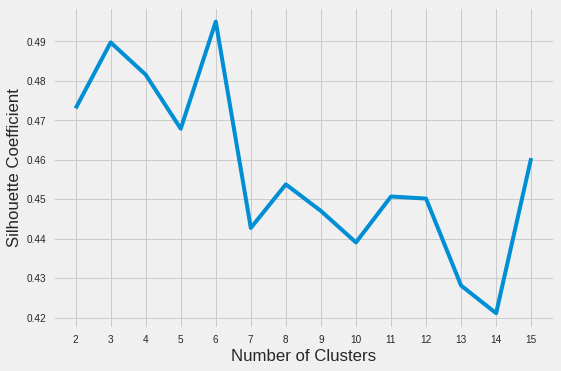

In [39]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_pca_covid_data)
    score = silhouette_score(x_pca_covid_data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Perform K-Means, on the reduced by PCA data set

In [49]:
kmeans = KMeans(n_clusters=5, init ='k-means++')
y_kmeans = kmeans.fit_predict(x_pca_covid_data)
centers = np.array(kmeans.cluster_centers_)
print(y_kmeans)

[2 2 3 0 0 4 3 3 3 3 3 3 3 0 3 4 1 3 1 3 1 0 3 0 0 1 0 1 1 1 3 0 3 1 0 1 0
 0 0 1 3 3 1 0 3 1 1 0 3 1 1 3 3 3 1 1 3 3 1 0 1 0 3 3 3 3 1 1 1 1 3 1 1 1
 1 1 1 0 3 1 1 1 1 0 1 0 3 1 3 1 1 1 1 3 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 3 1 1 0 1 1 1 1 0 1 0 3 3 1 1 3 1 1 1 1 3 1 3 3 1 0 1 0 0 1 0
 1 1 1 1 1 0 3 1 1 1 1 1 0 1 1 0 3 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 3 1 0 1 0
 1 0 0 1 3 0 1 1 1 1 1 0 1 1 1 1 3 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [41]:
#K-means clustering with PCA results
df_covid_data_pca_kmeans = pd.concat([covid_data_with_country.reset_index(drop=True),pd.DataFrame(x_pca_covid_data)],axis=1)
df_covid_data_pca_kmeans.columns.values[-5:] = ["component 1","component 2","component 3","component 4","component 5"]
df_covid_data_pca_kmeans["Covid Data K-means PCA"] = kmeans.labels_
df_covid_data_pca_kmeans.head(50)
df_covid_data_pca_kmeans.to_excel (r'./export_dataframe.xlsx', index = False, header=True)

In [42]:
df_covid_data_pca_kmeans["Clusters"] = df_covid_data_pca_kmeans["Covid Data K-means PCA"].map({0:"First",1:"Second",2:"Third",3:"Fourth",4:"Fifth"})
df_covid_data_pca_kmeans.head(10)

,Country,Population,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Revovered,Active Cases,"Serious, Critical Cases",...,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,component 1,component 2,component 3,component 4,component 5,Covid Data K-means PCA,Clusters
0,USA,3.341253e+08,79052681,0.0,939427.0,0.0,49435538.0,0.0,28677716.0,17454.0,...,2812.0,923990953.0,2765402.0,1.085813,2.047523,0.310500,-0.324870,-0.024700,2,Third
1,India,1.401828e+09,42536137,0.0,507208.0,0.0,41331158.0,0.0,697771.0,8944.0,...,362.0,747870047.0,533496.0,0.244948,1.510489,0.364838,-0.193047,0.054322,2,Third
2,Brazil,2.149902e+08,27125512,0.0,636111.0,0.0,23446849.0,0.0,3042552.0,8318.0,...,2959.0,63776166.0,296647.0,0.438377,0.783326,-0.162812,-0.134054,0.038945,3,Fourth
3,France,6.550591e+07,21372278,0.0,134207.0,0.0,16256611.0,389010.0,4981460.0,3622.0,...,2049.0,238632994.0,3642923.0,0.625847,0.370158,0.150688,0.142083,-0.294915,1,Second
4,UK,6.845974e+07,18162199,0.0,159158.0,0.0,15681335.0,0.0,2321706.0,430.0,...,2325.0,463984342.0,6777478.0,0.555399,0.314594,0.188688,-0.040646,0.129642,1,Second
5,Russia,1.460352e+08,13731794,203949.0,338813.0,722.0,11021633.0,112236.0,2371348.0,2300.0,...,2320.0,263100000.0,1801621.0,0.314471,0.603942,-0.263013,1.139214,-0.200119,4,Fifth
6,Turkey,8.579878e+07,12653276,0.0,89741.0,0.0,11755917.0,0.0,807618.0,1128.0,...,1046.0,135764979.0,1582365.0,0.134740,0.211387,0.074895,-0.059734,-0.030571,3,Fourth
7,Italy,6.031877e+07,11923631,0.0,150221.0,0.0,9960136.0,0.0,1813274.0,1322.0,...,2490.0,178984246.0,2967306.0,0.360558,0.198682,-0.033817,-0.060632,0.059770,3,Fourth
8,Germany,8.421498e+07,11897002,0.0,120196.0,0.0,8597300.0,110200.0,3179506.0,2274.0,...,1427.0,89622218.0,1064208.0,0.169893,0.242177,0.005251,-0.000074,-0.086216,3,Fourth
9,Spain,4.678392e+07,10555196,0.0,95606.0,0.0,7264623.0,0.0,3194967.0,1633.0,...,2044.0,66213858.0,1415312.0,0.310707,0.111864,-0.029798,-0.080272,-0.057858,3,Fourth


/home/geekarea/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


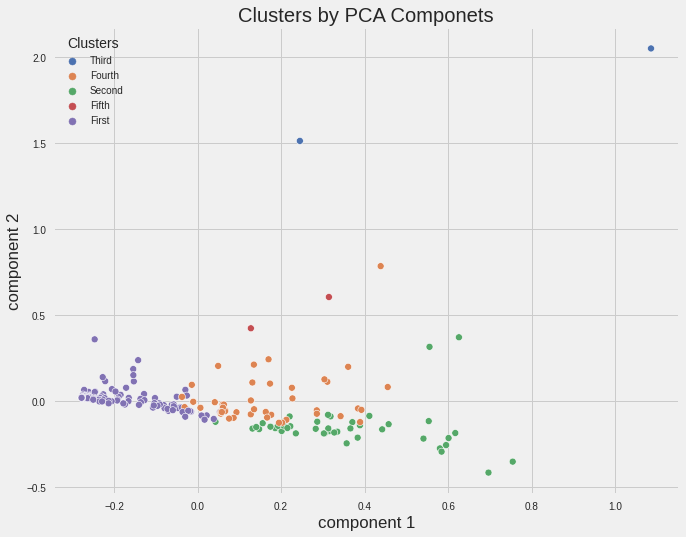

In [50]:
x_axis = df_covid_data_pca_kmeans["component 1"]
y_axis = df_covid_data_pca_kmeans["component 2"]
plt.figure(figsize = (10,8))

T=PCA_components.iloc[:,:4]

# store writing xvector yvector columns the values of PCA component in variable: for easy
xvector = pca.components_[0] * max(T[0])
yvector = pca.components_[1] * max(T[1])
columns = covid_data.columns
    
#print(df_covid_data_pca_kmeans)
#palette =['g','r','c','m','y']
sns.scatterplot(x_axis,y_axis,hue=df_covid_data_pca_kmeans["Clusters"],palette="deep")
plt.title("Clusters by PCA Componets")
plt.show()

## Project each original feature on the principal component axis, to represent the level of importance of each feature in the multidimensional scaling

USA
India
Brazil
UK
Russia
Germany
Mexico
Denmark
China


/home/geekarea/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


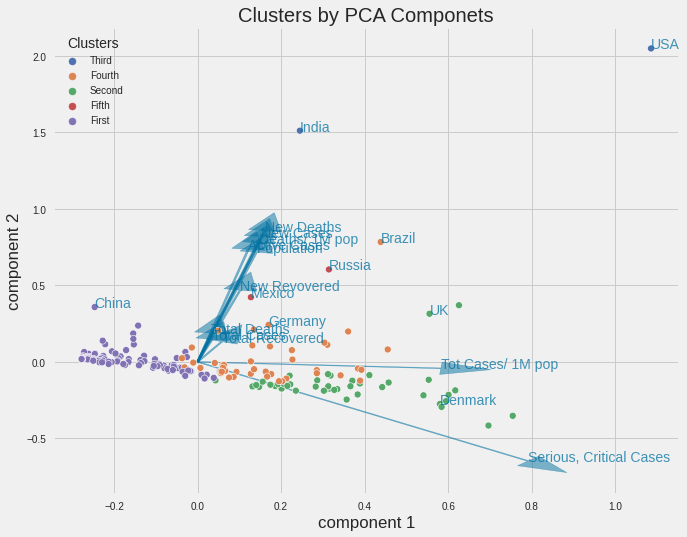

In [43]:
x_axis = df_covid_data_pca_kmeans["component 1"]
y_axis = df_covid_data_pca_kmeans["component 2"]
plt.figure(figsize = (10,8))

T=PCA_components.iloc[:,:4]

# store writing xvector yvector columns the values of PCA component in variable: for easy
xvector = pca.components_[0] * max(T[0])
yvector = pca.components_[1] * max(T[1])
columns = covid_data.columns

for i in range(1,len(columns)-2):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],color='b', width=0.005,head_width=0.08, alpha=0.5)
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i],color='b', alpha=0.75)

    
for index, row in df_covid_data_pca_kmeans.iterrows():    
    
    # plot name of features
    if row['Clusters'] == 'Third':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Clusters'] == 'Fifth':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Country'] == 'UK':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Country'] == 'Germany':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Country'] == 'Brazil':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Country'] == 'China':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    if row['Country'] == 'Denmark':
        print(row['Country'])
        plt.text(row['component 1'], row['component 2'], row['Country'],color='b', alpha=0.75)
    
    
#print(df_covid_data_pca_kmeans)
#palette =['g','r','c','m','y']
sns.scatterplot(x_axis,y_axis,hue=df_covid_data_pca_kmeans["Clusters"],palette="deep")
plt.title("Clusters by PCA Componets")
plt.show()

In [44]:
# count of points in each of the above-formed clusters
frame = pd.DataFrame(x_pca_covid_data)
frame['Cluster'] = y_kmeans
frame['Cluster'].value_counts()
print(frame['Cluster'].value_counts())

0    131
1     46
3     44
2      2
4      2
Name: Cluster, dtype: int64
